In [ ]:
# General tools
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# For the tree visualization
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# For validation
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
#read the data
insurance = pd.read_csv('insurance.csv')


insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


**Pre processing**

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# change categorical valiables to numbers
insurance['sex']=insurance['sex'].replace({'female': 1, 'male': 0})
insurance['smoker']=insurance['smoker'].replace({'yes': 1, 'no': 0})


In [ ]:
# change categorical valiables to numbers
insurance.region.unique()
insurance['region']=insurance['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})





In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
# another way to check if there are missing values (Nans)
print(insurance.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
pd.set_option('float_format', '{:.2f}'.format)
insurance.describe().T



,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
sex,1338.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
smoker,1338.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
region,1338.00,1.48,1.10,0.00,1.00,1.00,2.00,3.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


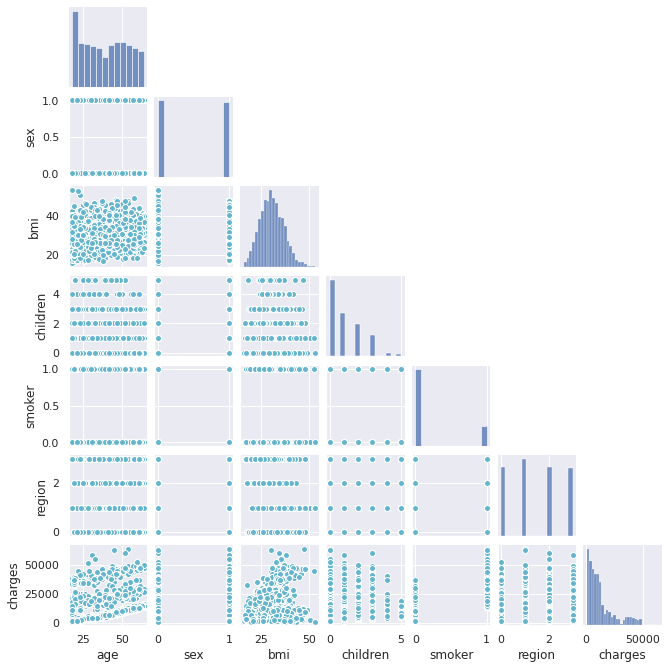

In [ ]:
# insurance check correlations and distributions
sns.set(font_scale=1) 
insurance_num = insurance.select_dtypes(include=np.number)
sns.pairplot(insurance_num, height=1.35, plot_kws=dict(linewidth=1, color='c'), corner=True)



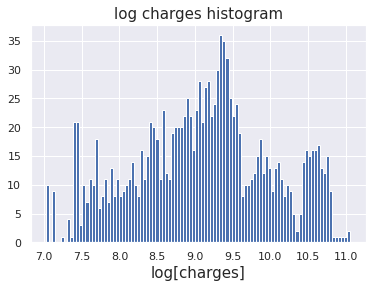

In [ ]:
#maybe log charges is better to predict than charges?

log_charges = np.log1p(insurance.charges)
ax=log_charges.hist(bins=100)
plt.title('log charges histogram', fontsize=15)
ax.set_xlabel('log[charges]', fontsize=15)

# add log charges to insurance
insurance['log_charges'] = log_charges
insurance2['log_charges'] = log_charges


In [ ]:
# no significant outliers are observed
# charges seem to be linearily dependent with age 
#charges reduces with the number of childern
#charges increase with smokers
# region and sex - seem to have no effect on charges (same distributions per region)

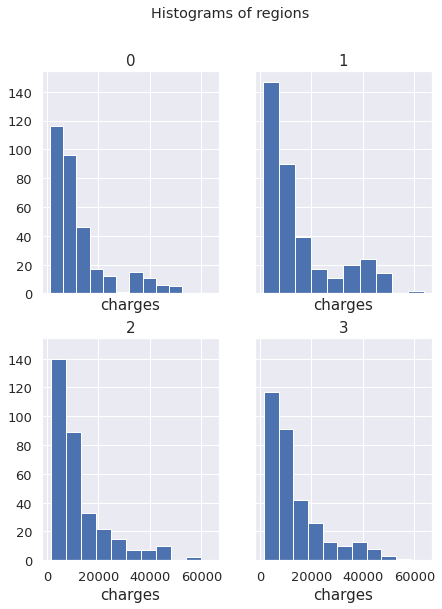

Very similar histograms. region is removed


In [ ]:
# plot charges histogram per region
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[7,9])
axs= ax.flatten()
fig.suptitle('Histograms of regions')

for i in range(0,4):
  insurance_region = insurance[insurance['region']==i]
  axs[i].hist(insurance_region['charges'])
  axs[i].set_title(i, fontsize=15)
  axs[i].set_xlabel('charges', fontsize=15)
  axs[i].tick_params(axis='both', which='major', labelsize=13)

plt.show()
fig.tight_layout()
plt.close()        
          


print('Very similar histograms. region is removed')

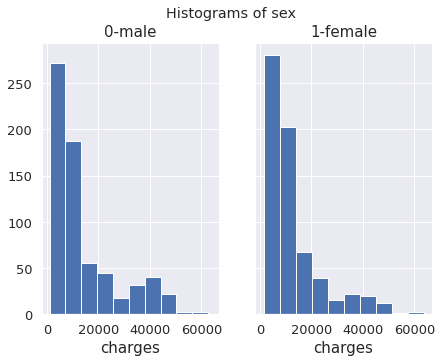

In [ ]:
# plot charges histogram per region
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=[7,5])
axs= ax.flatten()
fig.suptitle('Histograms of sex')
names=['0-male','1-female']

for i in range(0,2):
  insurance_region = insurance[insurance['sex']==i]
  axs[i].hist(insurance_region['charges'])
  axs[i].set_title(f'{names[i]}', fontsize=15)
  axs[i].set_xlabel('charges', fontsize=15)
  axs[i].tick_params(axis='both', which='major', labelsize=13)


plt.show()
fig.tight_layout()
plt.close()   

Text(0.5, 0, '')

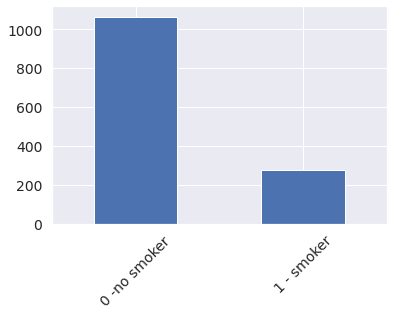

In [ ]:
ax=insurance.groupby(['smoker'])['smoker'].count().plot.bar()
ax.set_xticklabels(['0 -no smoker','1 - smoker'], rotation=45)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('')

#maybe it is better to predict the charges for smokers and no smokers separetly?



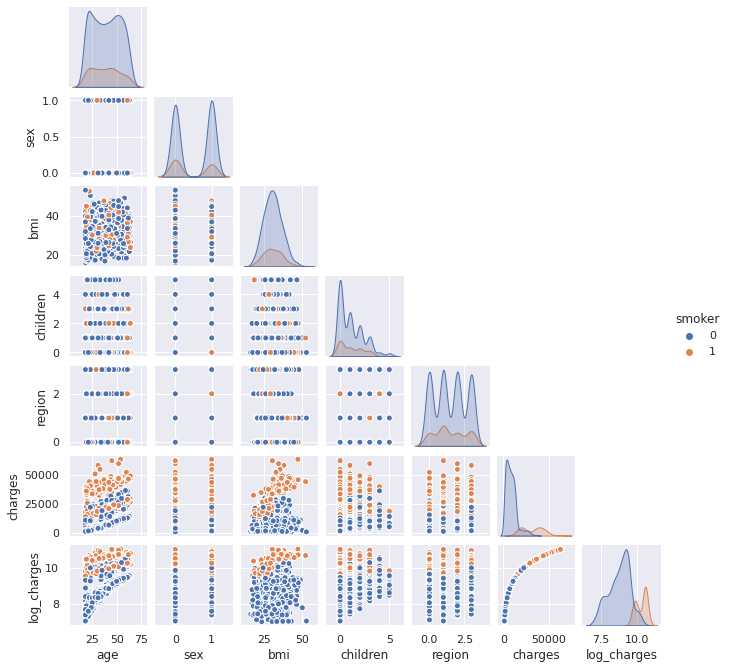

In [ ]:
# insurance check correlations and distributions
sns.set(font_scale=1) 
insurance_num = insurance.select_dtypes(include=np.number)
sns.pairplot(insurance_num, height=1.35, plot_kws=dict(linewidth=1, color='c'), corner=True, hue="smoker")

no significat correlation between the features 

log_charges is more correlated with the features than charges!


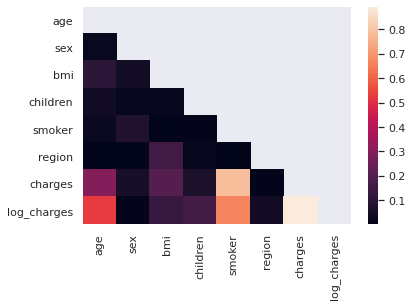

In [ ]:
#correlation matrix

sns.heatmap(insurance.corr().abs(), mask=np.triu(np.ones_like(insurance.corr().abs(), dtype=bool)))
print('no significat correlation between the features','\n')
print('log_charges is more correlated with the features than charges!')

In [ ]:
# sex and region features can be removed

**Machine learning**
1. **Linear regression**
2. **decision tree**
3.**kNN** 

**Linear regression**

In [ ]:
#split the data to train and test sets
insurance_train, insurance_test = train_test_split(insurance, train_size=0.7, random_state=12345)

In [ ]:
X_train = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_train = insurance_train['log_charges']
X_test = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_test = insurance_test['log_charges']

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
1046,43,1,25.080,0,0,3
358,23,0,41.910,0,0,1
1144,50,0,32.300,2,0,0
522,51,1,33.915,0,0,3
54,40,1,28.690,3,0,2


In [ ]:
y_train.head()

1046    8.899192
358     7.516587
1144    9.172784
522     9.196982
54      8.994753
Name: log_charges, dtype: float64

In [ ]:
# fit linear regression with all the features (target is log_charges)
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)





In [ ]:
y_train_pred = pd.DataFrame({"y_train_pred":y_train_pred})

y_train = pd.DataFrame(y_train)
y_train.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)

X = X_train.copy()
X['y_train_pred'] = y_train_pred
X['y_train'] = y_train

In [ ]:
X.head(10)

,age,sex,bmi,children,smoker,region,y_train_pred,y_train
0,43,1,25.080,0,0,3,8.873038,8.899192
1,23,0,41.910,0,0,1,8.163254,7.516587
2,50,0,32.300,2,0,0,9.156528,9.172784
3,51,1,33.915,0,0,3,9.257992,9.196982
4,40,1,28.690,3,0,2,9.046828,8.994753
5,56,0,33.630,0,1,2,10.845051,10.690175
6,43,1,24.700,2,1,2,10.564925,9.993411
7,18,1,31.130,0,0,1,7.953683,7.391959
8,54,0,30.020,0,0,2,9.179597,10.105509
9,31,0,31.065,3,0,2,8.663066,8.598962


(array([ 6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 7 Text major ticklabel objects>)

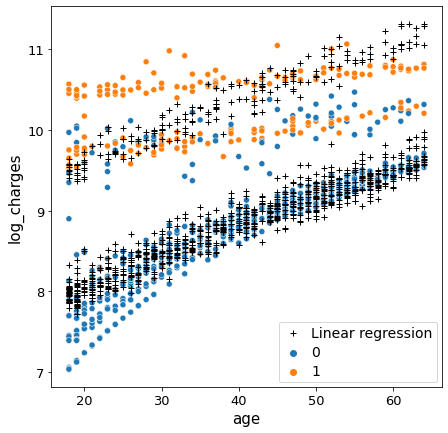

In [ ]:
# plot the fitted graph in the 2D space
fig=plt.figure(figsize=(7,7))
colors = {'0':'c', '1':'orange'}

ax = sns.scatterplot(data=X, x="age", y="y_train", hue="smoker")

#plt.scatter(X_train['age'], y_train, marker='.',c=X_train['smoker'].astype('str').apply(lambda x: colors[x]),
            #linewidth = 3.5, label = 'data')
ax.plot(X_train['age'], y_train_pred['y_train_pred'],'+k', linewidth = 1.8, label='Linear regression')
plt.xlabel('age', fontsize=15)
plt.ylabel('log_charges', fontsize=15)
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=14)
plt.setp(ax.get_legend().get_title(), fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


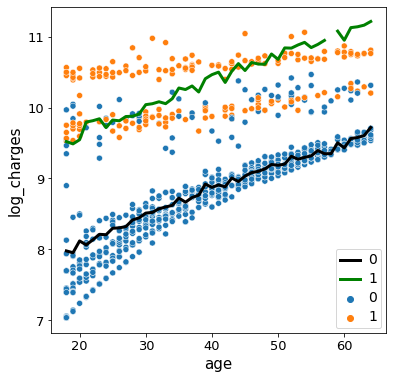

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data=X, x="age", y="y_train", hue="smoker")
#ax.legend(labels=['0-mean pred linear regression', '1-mean pred linear regression'], prop={"size":13})

X.groupby(['age', 'smoker'])['y_train_pred'].mean().unstack(1).plot(color=['k', 'g'], linewidth=3, ax=ax)
#X.plot(x='age', y='y_train', c='c', ax=ax, kind='scatter', label='data')
plt.ylabel('log_charges', fontsize=15)
plt.xlabel('age', fontsize=15)
#plt.legend(labels=['0 (no smoker)-linear regression', '1 (smoker)-linear regression', '0', '1'])
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=14)
plt.setp(ax.get_legend().get_title(), fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()



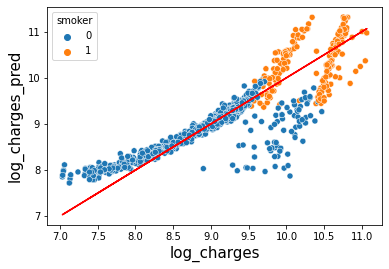

Linear reggression is not a good model for the insurance dataset
non linear regression is more appropriate


In [ ]:
axs = sns.scatterplot(data=X,x='y_train', y='y_train_pred', hue='smoker')
axs.set_label(['0 - no smoker','1 - smoker'])
axs.plot(y_train, y_train, 'r')
axs.set_ylabel('log_charges_pred')
plt.xlabel('log_charges', fontsize=15)
plt.ylabel('log_charges_pred', fontsize=15)
plt.show()
print('Linear reggression is not a good model for the insurance dataset\nnon linear regression is more appropriate')

In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":model.coef_})

,Feature,Coefficients
0,age,0.035546
1,sex,0.090890
2,bmi,0.011385
3,children,0.096374
4,smoker,1.553262
5,region,0.049796


In [ ]:

#rmse for linear regression with all features. Targer: log_chargers
rmse = np.sqrt(mean_squared_error(y_train_pred,y_train))
print(f'RMSE = {rmse:.2f}\nIn which group (smokers vs non-smokers) the error is bigger?')



RMSE = 0.44
In which group (smokers vs non-smokers) the error is bigger?


In [ ]:
#rmse for linear regression with all features for non smokers. Targer: log_chargers
y_train_pred_non_smokers = X.loc[X.smoker==0,'y_train_pred']
y_train_non_smokers = X.loc[X.smoker==0,'y_train']


rmse = np.sqrt(mean_squared_error(y_train_pred_non_smokers,y_train_non_smokers))
print(f'RMSE = {rmse:.2f}')

RMSE = 0.43


In [ ]:
#rmse for linear regression with all features for smokers. Targer: log_chargers
y_train_pred_smokers = X.loc[X.smoker==1,'y_train_pred']
y_train_smokers = X.loc[X.smoker==1,'y_train']


rmse = np.sqrt(mean_squared_error(y_train_pred_smokers,y_train_smokers))
print(f'RMSE = {rmse:.2f}\nthe error is bigger in the smokers group')

RMSE = 0.49
the error is bigger in the smokers group


In [ ]:
#linear regression with dropping region and sex
X_train_removed = X_train.drop(['sex', 'region'], axis=1, inplace = False)
X_test_removed = X_test.drop(['sex', 'region'], axis=1, inplace = False)


In [ ]:
X_train_removed.head()

,age,bmi,children,smoker
0,43,25.080,0,0
1,23,41.910,0,0
2,50,32.300,2,0
3,51,33.915,0,0
4,40,28.690,3,0


In [ ]:
X_test_removed.head()

,age,bmi,children,smoker
734,59,32.10,3,0
638,39,26.41,0,1
694,27,34.80,1,0
858,25,32.23,1,0
484,48,34.30,3,0


In [ ]:
# fit linear regression after removing sex and region (target is log_charges)
model1 = LinearRegression().fit(X_train_removed, y_train)
y_train_removed_pred = model1.predict(X_train_removed)

In [ ]:
#rmse for linear regression after removing sex and region. Targer: log_chargers
rmse_removed = np.sqrt(mean_squared_error(y_train_removed_pred,y_train))
print(f'RMSE = {rmse_removed:.2f}\nSAME with and without sex and region features')

RMSE = 0.44
SAME with and without sex and region features


In [ ]:
#predict test set
y_test_removed_pred = model1.predict(X_test_removed)

In [ ]:
#rmse for linear regression after removing sex and region for the test set. Targer: log_chargers
rmse_removed_test = np.sqrt(mean_squared_error(y_test_removed_pred,y_test))
print(f'RMSE = {rmse_removed_test:.2f}')

RMSE = 0.46


non - linear regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train, y_train)
y_train_pred_nonlinear = polyreg.predict(X_train)

y_train_pred_nonlinear = pd.DataFrame({"y_train_pred":y_train_pred_nonlinear})

y_train = pd.DataFrame(y_train)
y_train.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)

X = X_train.copy()
X['y_train_pred_nonlinear'] = y_train_pred_nonlinear
X['y_train'] = y_train

In [ ]:
X.head(10)

,age,sex,bmi,children,smoker,region,y_train_pred_nonlinear,y_train
0,43,1,25.08,0,0,3,8.92,8.90
1,23,0,41.91,0,0,1,7.78,7.52
2,50,0,32.30,2,0,0,9.26,9.17
3,51,1,33.91,0,0,3,9.31,9.20
4,40,1,28.69,3,0,2,9.20,8.99
5,56,0,33.63,0,1,2,10.72,10.69
6,43,1,24.70,2,1,2,10.11,9.99
7,18,1,31.13,0,0,1,7.71,7.39
8,54,0,30.02,0,0,2,9.33,10.11
9,31,0,31.07,3,0,2,8.78,8.60


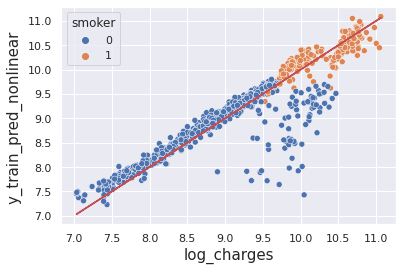

In [ ]:
axs = sns.scatterplot(data=X,x='y_train', y='y_train_pred_nonlinear', hue='smoker')
axs.set_label(['0 - no smoker','1 - smoker'])
axs.plot(y_train, y_train, 'r')
axs.set_ylabel('y_train_pred_nonlinear ')
plt.xlabel('log_charges', fontsize=15)
plt.ylabel('y_train_pred_nonlinear ', fontsize=15)
plt.show()

In [ ]:
#rmse for nonlinear regression Targer: log_chargers
rmse_nonlinear = np.sqrt(mean_squared_error(y_train_pred_nonlinear,y_train))
print(f'RMSE = {rmse_nonlinear :.2f} of non linear regression (train set)')

#rmse for nonlinear regression Targer: log_chargers
y_test_pred_nonlinear = polyreg.predict(X_test)
rmse_nonlinear = np.sqrt(mean_squared_error(y_test_pred_nonlinear,y_test))
print(f'RMSE = {rmse_nonlinear :.2f} of non linear regression (test set)')

RMSE = 0.36 of non linear regression (train set)
RMSE = 0.39 of non linear regression (test set)


Linear regression for non smokers and smokers separetly

RMSE of non-smokers train set = 0.41
RMSE of non-smokers test set = 0.42
RMSE of smokers train set = 0.19
RMSE of smokers test set = 0.20


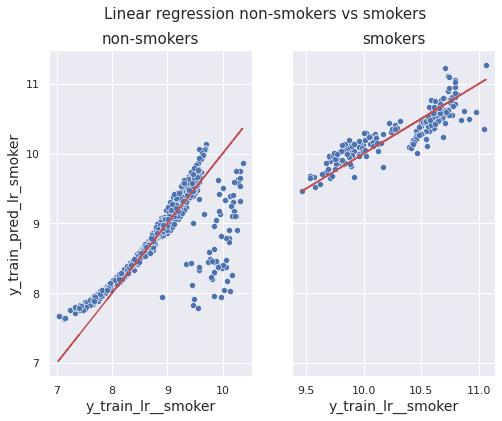

In [ ]:
#Linear regression for non smokers/smokers separetly
#split the data to train and test sets

# plot charges histogram per region
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,6))
axs= ax.flatten()
fig.suptitle('Linear regression non-smokers vs smokers', fontsize=15)
titles = ['non-smokers', 'smokers']

for i in range(0,2):

  insurance_train, insurance_test = train_test_split(insurance.loc[insurance.smoker==i], train_size=0.7, random_state=12345)

  X_train_lr_smoker = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
  y_train_lr_smoker = insurance_train['log_charges']
  X_test_lr_smoker = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
  y_test_lr_smoker = insurance_test['log_charges']

  # fit linear regression with all the features (target is log_charges)
  model = LinearRegression().fit(X_train_lr_smoker, y_train_lr_smoker)
  y_train_pred_lr_smoker = model.predict(X_train_lr_smoker)

  y_train_pred_lr_smoker = pd.DataFrame({'y_train_pred_lr_smoker':y_train_pred_lr_smoker})

  y_train_lr_smoker = pd.DataFrame(y_train_lr_smoker)
  y_train_lr_smoker.reset_index(drop=True, inplace=True)

  X_train_lr_smoker.reset_index(drop=True, inplace=True)

  X_lr_smoker = X_train_lr_smoker.copy()
  X_lr_smoker['y_train_pred_lr_smoker'] = y_train_pred_lr_smoker
  X_lr_smoker['y_train_lr_smoker'] = y_train_lr_smoker

  sns.scatterplot(data=X_lr_smoker, x='y_train_lr_smoker', y='y_train_pred_lr_smoker', ax=axs[i])
  axs[i].plot(y_train_lr_smoker,y_train_lr_smoker, 'r')
  axs[i].set_xlabel('y_train_lr__smoker', fontsize=14)
  axs[i].set_ylabel('y_train_pred_lr_smoker', fontsize=14)
  axs[i].set_title(f'{titles[i]}', fontsize=15)
  
  #rmse Linear regression Targer: log_chargers (train set)
  rmse_lr_train = np.sqrt(mean_squared_error(y_train_pred_lr_smoker,y_train_lr_smoker))
  print(f'RMSE of {titles[i]} train set = {rmse_lr_train:.2f}')

  #rmse Linear regression Targer: log_chargers (test set)
  y_test_pred_lr_smoker = model.predict(X_test_lr_smoker)
  rmse_lr_test = np.sqrt(mean_squared_error(y_test_pred_lr_smoker,y_test_lr_smoker))
  print(f'RMSE of {titles[i]} test set = {rmse_lr_test:.2f}')

plt.show()
fig.tight_layout()
plt.close() 

- nonlinear regression for non-smoker and smoker separetly should be done!


**Decision tree**

In [ ]:
#split the data to train and test sets
insurance_train, insurance_test = train_test_split(insurance, train_size=0.7, random_state=12345)

In [ ]:
X_train_tree = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_train_tree = insurance_train['log_charges']
X_test_tree = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_test_tree = insurance_test['log_charges']

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=20, min_samples_leaf=10).fit(X_train_tree, y_train_tree)
y_train_pred_tree = dt_model.predict(X_train_tree)

In [ ]:
def visualize_tree(model, md=7):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train_tree.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=900) 

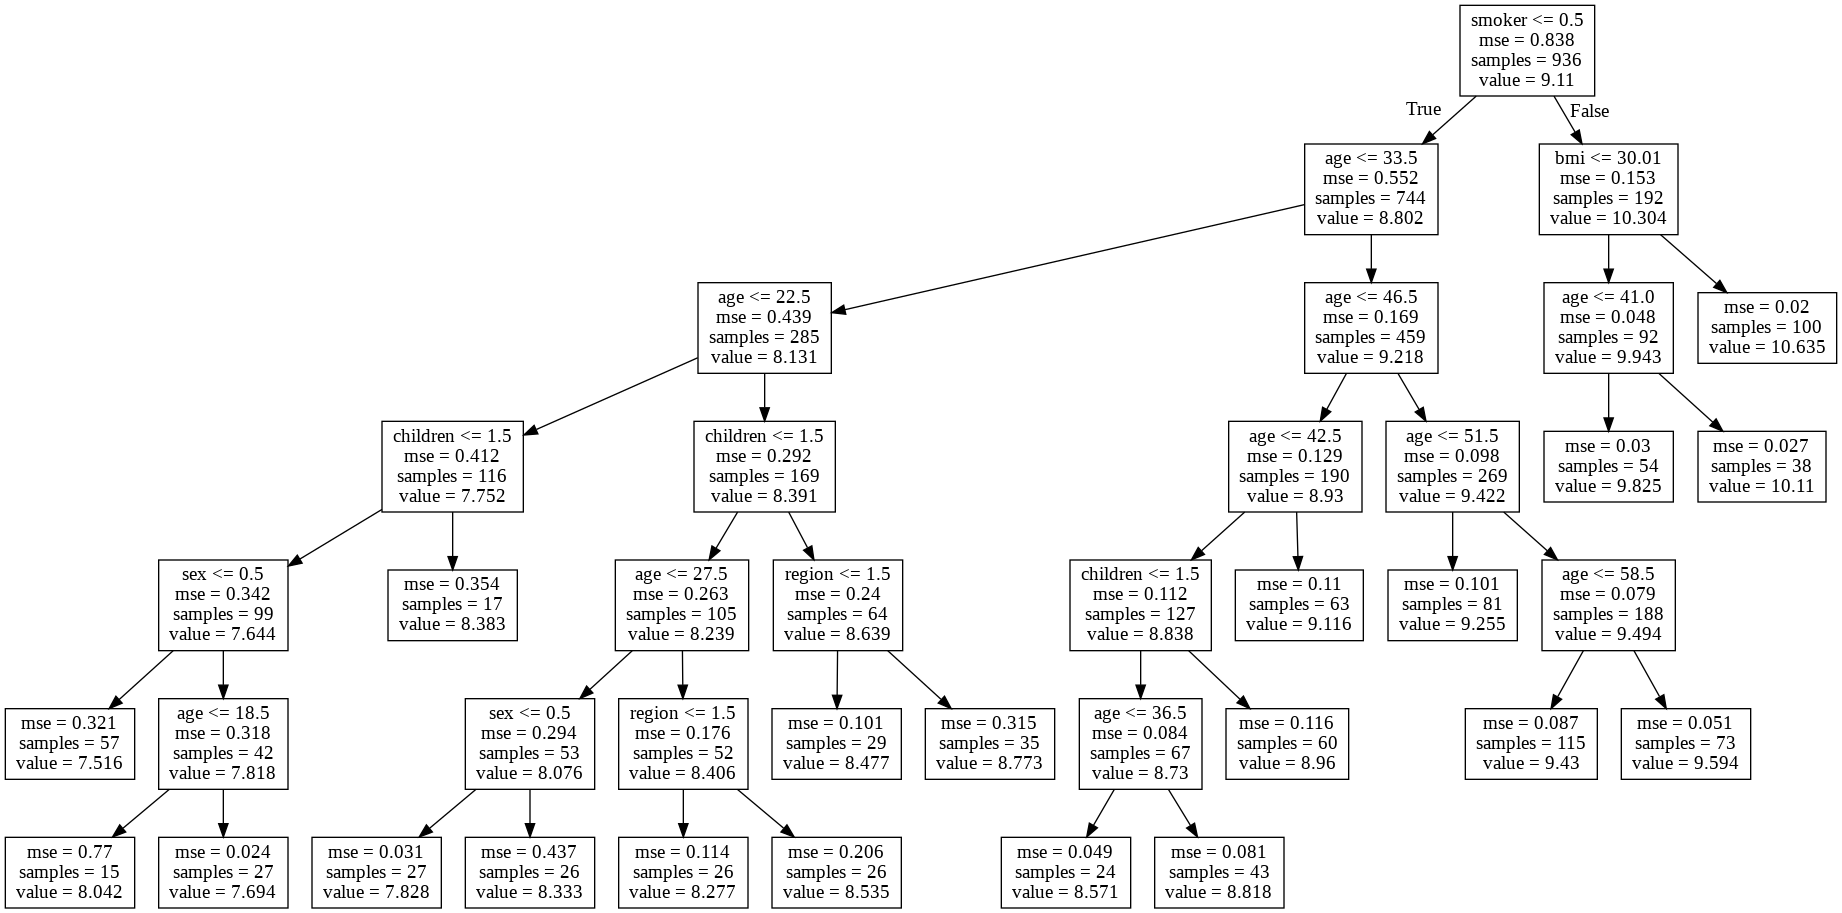

In [ ]:
visualize_tree(dt_model, md=7)

In [ ]:
y_train_pred_tree = pd.DataFrame({"y_train_pred_tree":y_train_pred_tree})

y_train_tree = pd.DataFrame(y_train_tree)
y_train_tree.reset_index(drop=True, inplace=True)

X_train_tree.reset_index(drop=True, inplace=True)

X_tree = X_train_tree.copy()
X_tree['y_train_pred_tree'] = y_train_pred_tree
X_tree['y_train_tree'] = y_train_tree

In [ ]:
X_tree.head(10)

,age,sex,bmi,children,smoker,region,y_train_pred_tree,y_train_tree
0,43,1,25.080,0,0,3,9.116052,8.899192
1,23,0,41.910,0,0,1,7.828142,7.516587
2,50,0,32.300,2,0,0,9.255063,9.172784
3,51,1,33.915,0,0,3,9.255063,9.196982
4,40,1,28.690,3,0,2,8.959667,8.994753
5,56,0,33.630,0,1,2,10.635402,10.690175
6,43,1,24.700,2,1,2,10.109998,9.993411
7,18,1,31.130,0,0,1,8.042403,7.391959
8,54,0,30.020,0,0,2,9.430002,10.105509
9,31,0,31.065,3,0,2,8.772868,8.598962


(array([ 6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 <a list of 11 Text major ticklabel objects>)

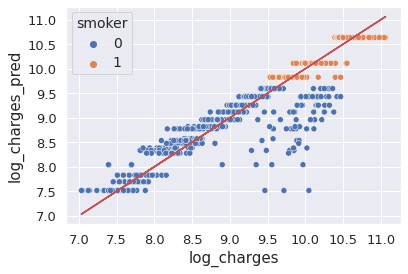

In [ ]:
axs = sns.scatterplot(data=X_tree,x='y_train_tree', y='y_train_pred_tree', hue='smoker')
#axs.set_label(['0 - no smoker','1 - smoker'])
axs.plot(y_train_tree, y_train_tree, 'r')
axs.set_ylabel('log_charges_pred')
plt.xlabel('log_charges', fontsize=15)
plt.ylabel('log_charges_pred', fontsize=15)
plt.setp(axs.get_legend().get_texts(), fontsize=14)
plt.setp(axs.get_legend().get_title(), fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [ ]:
#rmse (train) for decision tree. Targer: log_chargers
rmse_tree = np.sqrt(mean_squared_error(y_train_pred_tree,y_train_tree))
print(f'RMSE = {rmse_tree:.2f}')

RMSE = 0.35


In [ ]:
#predict test set
y_test_pred_tree = dt_model.predict(X_test_tree)

#rmse (test) for decision tree. Targer: log_chargers
rmse_tree_test = np.sqrt(mean_squared_error(y_test_pred_tree,y_test_tree))
print(f'RMSE = {rmse_tree_test:.2f}')

RMSE = 0.39


Remove outliers from the non-smokers

In [ ]:
# remove log_charges of non smokers which are between 9.3 and 10.5 (ourliers)
cond1 = insurance['smoker']==0
cond2 = insurance['log_charges'].between(9.3,10.5)
insurance_removed_ourliers = insurance.drop(insurance[cond1 & cond2].index)


In [ ]:
insurance_removed_ourliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1041 non-null   int64  
 1   sex          1041 non-null   int64  
 2   bmi          1041 non-null   float64
 3   children     1041 non-null   int64  
 4   smoker       1041 non-null   int64  
 5   region       1041 non-null   int64  
 6   charges      1041 non-null   float64
 7   log_charges  1041 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 73.2 KB


Text(0.5, 0, '')

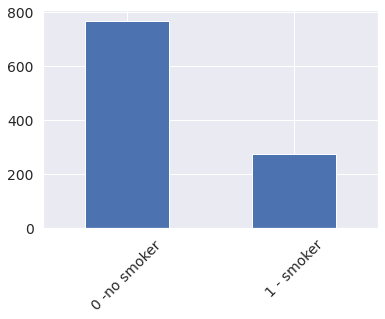

In [ ]:
ax=insurance_removed_ourliers.groupby(['smoker'])['smoker'].count().plot.bar()
ax.set_xticklabels(['0 -no smoker','1 - smoker'], rotation=45)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('')

In [ ]:
#split the data to train and test sets
insurance_train, insurance_test = train_test_split(insurance_removed_ourliers, train_size=0.7, random_state=12345)

In [ ]:
X_train_tree = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_train_tree = insurance_train['log_charges']
X_test_tree = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_test_tree = insurance_test['log_charges']

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=20, min_samples_leaf=10).fit(X_train_tree, y_train_tree)
y_train_pred_tree = dt_model.predict(X_train_tree)

In [ ]:
def visualize_tree(model, md=7):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=900) 

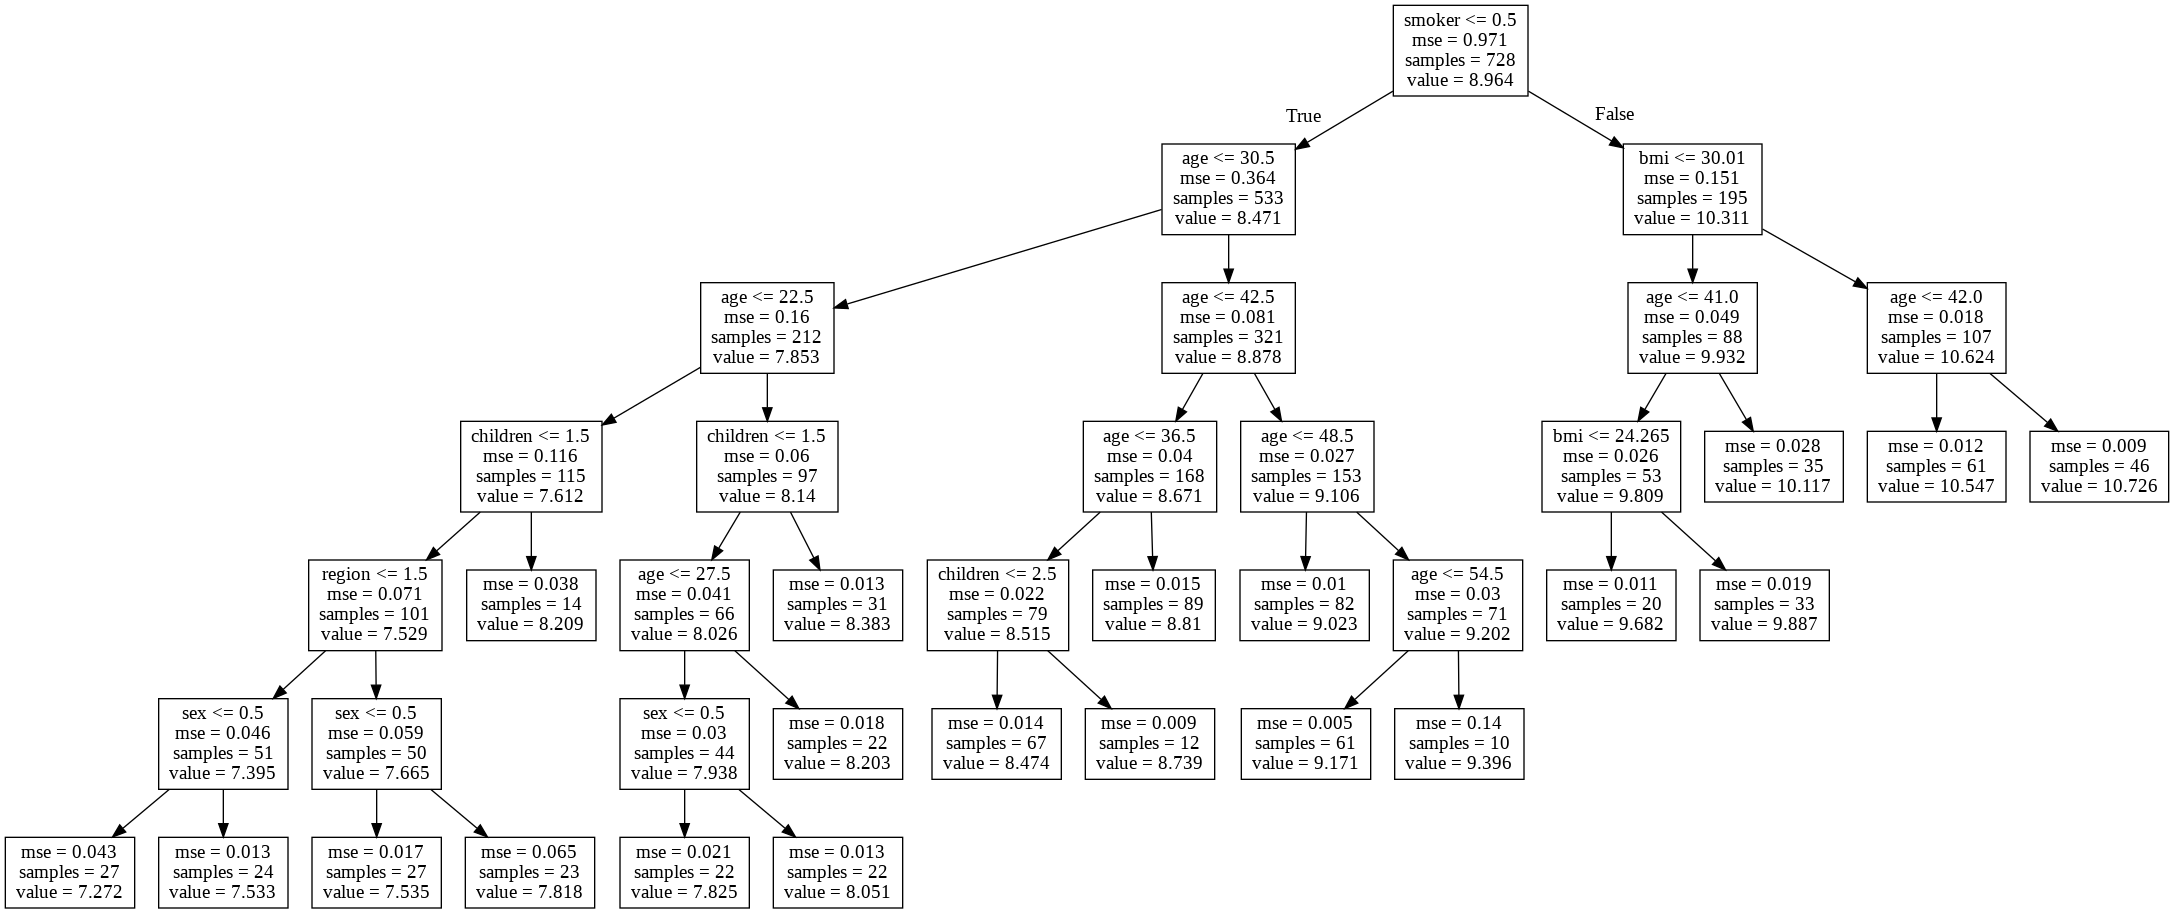

In [ ]:
visualize_tree(dt_model, md=7)

In [ ]:
y_train_pred_tree = pd.DataFrame({"y_train_pred_tree":y_train_pred_tree})

y_train_tree = pd.DataFrame(y_train_tree)
y_train_tree.reset_index(drop=True, inplace=True)

X_train_tree.reset_index(drop=True, inplace=True)

X_tree = X_train_tree.copy()
X_tree['y_train_pred_tree'] = y_train_pred_tree
X_tree['y_train_tree'] = y_train_tree

In [ ]:
X_tree.head()

,age,sex,bmi,children,smoker,region,y_train_pred_tree,y_train_tree
0,39,0,42.655,0,0,3,8.810042,8.658417
1,41,0,28.800,1,0,0,8.810042,8.745640
2,18,0,38.170,0,1,1,10.546637,10.499815
3,38,1,28.000,3,0,0,8.810042,8.875160
4,24,1,30.100,3,0,0,8.382791,8.351357


(array([ 6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 <a list of 11 Text major ticklabel objects>)

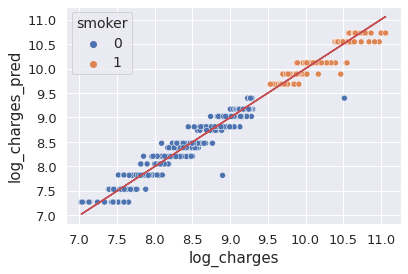

In [ ]:
axs = sns.scatterplot(data=X_tree,x='y_train_tree', y='y_train_pred_tree', hue='smoker')
#axs.set_label(['0 - no smoker','1 - smoker'])
#handles0, labels0 = axs.get_legend_handles_labels()
axs.plot(y_train_tree, y_train_tree, 'r')
#leg = axs.legend(handles=handles0[0:], labels=labels0[0:])
plt.xlabel('log_charges', fontsize=15)
plt.ylabel('log_charges_pred', fontsize=15)
plt.setp(axs.get_legend().get_texts(), fontsize=14)
plt.setp(axs.get_legend().get_title(), fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [ ]:
#rmse (train) for decision tree. Targer: log_chargers
rmse_tree = np.sqrt(mean_squared_error(y_train_pred_tree,y_train_tree))
print(f'RMSE = {rmse_tree:.2f}')

RMSE = 0.14


In [ ]:
#predict test set
y_test_pred_tree = dt_model.predict(X_test_tree)

#rmse (test) for decision tree. Targer: log_chargers
rmse_tree_test = np.sqrt(mean_squared_error(y_test_pred_tree,y_test_tree))
print(f'RMSE = {rmse_tree_test:.2f}')

RMSE = 0.17


In [ ]:
class MyTreeModel:
    def __init__(self, max_leaf_nodes_param):
      self.dt_model = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=max_leaf_nodes_param, min_samples_leaf=10)

    def fit(self, X, y):
      self.model_fit = self.dt_model.fit(X, y)
      return self

    def predict(self, X):
      self.y_pred = self.model_fit.predict(X)
      return self

    def score(self,y):
      self.rmse_tree_opt = np.sqrt(mean_squared_error(self.y_pred,y))
      return self


In [ ]:
# find the optimal tree model by scoring different values for max_leaf_node 

leaf_numbers = range(2, 50 , 1)
scores = pd.DataFrame(index=leaf_numbers, columns=['train', 'test'])

for num_leafs in leaf_numbers:
    model_tree = MyTreeModel(num_leafs)
    model_tree.fit(X_train_tree , y_train_tree )
    model_tree.predict(X_train_tree)
    model_tree.score(y_train_tree)
    scores.loc[num_leafs, 'train'] = model_tree.rmse_tree_opt
    #score for test set
    model_tree.predict(X_test_tree)
    model_tree.score(y_test_tree)
    scores.loc[num_leafs, 'test'] = model_tree.rmse_tree_opt

In [ ]:
scores.head()

,train,test
2,0.554127,0.575385
3,0.350442,0.375369
4,0.301717,0.335422
5,0.264997,0.294841
6,0.223628,0.250009


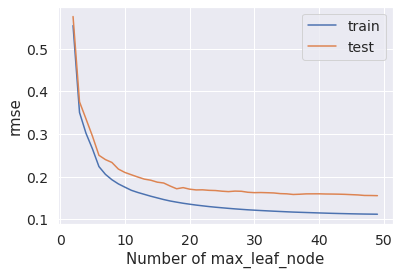

In [ ]:
scores.plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of max_leaf_node', fontsize=15)
plt.ylabel('rmse', fontsize=15)
plt.legend(fontsize=14)

**kNN**

In [ ]:
#split the data to train and test sets
insurance_train, insurance_test = train_test_split(insurance, train_size=0.7, random_state=12345)

In [ ]:
X_train_knn = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_train_knn = insurance_train['log_charges']
X_test_knn = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_test_knn = insurance_test['log_charges']

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=7).fit(X_train_knn, y_train_knn)
y_train_pred_knn = knn_model.predict(X_train_knn)

In [ ]:
y_train_pred_knn = pd.DataFrame({"y_train_pred_knn":y_train_pred_knn})

y_train_knn = pd.DataFrame(y_train_knn)
y_train_knn.reset_index(drop=True, inplace=True)

X_train_knn.reset_index(drop=True, inplace=True)

X_knn = X_train_knn.copy()
X_knn['y_train_pred_knn'] = y_train_pred_knn
X_knn['y_train_knn'] = y_train_knn

In [ ]:
#rmse (test) for knn. Targer: log_chargers
rmse_knn_train = np.sqrt(mean_squared_error(y_train_pred_knn, y_train_knn))
print(f'RMSE = {rmse_knn_train:.2f}')

RMSE = 0.68


(array([ 6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 <a list of 11 Text major ticklabel objects>)

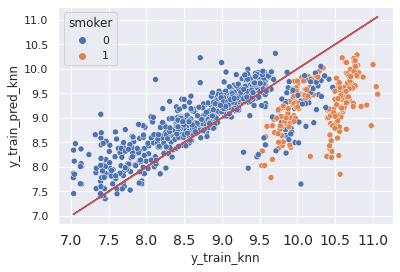

In [ ]:
ax = sns.scatterplot(data=X_knn,x='y_train_knn', y='y_train_pred_knn', hue='smoker')
ax.plot(y_train, y_train, 'r')
plt.xticks(fontsize=14)

kNN for no smokers/ smokers separetly

RMSE of train set non-smokers = 0.37
RMSE of test set non-smokers = 0.46
RMSE of train set smokers = 0.14
RMSE of test set smokers = 0.16


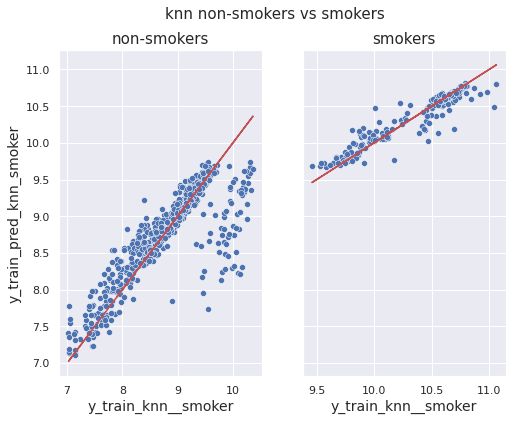

In [ ]:
#knn for non smokers/smokers separetly
#split the data to train and test sets

# plot charges histogram per region
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,6))
axs= ax.flatten()
fig.suptitle('knn non-smokers vs smokers', fontsize=15)
titles = ['non-smokers', 'smokers']

for i in range(0,2):

  insurance_train, insurance_test = train_test_split(insurance.loc[insurance.smoker==i], train_size=0.7, random_state=12345)

  X_train_knn_smoker = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
  y_train_knn_smoker = insurance_train['log_charges']
  X_test_knn_smoker = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
  y_test_knn_smoker = insurance_test['log_charges']

  knn_model_smoker = KNeighborsRegressor(n_neighbors=7, weights = 'uniform').fit(X_train_knn_smoker, y_train_knn_smoker)
  y_train_pred_knn_smoker = knn_model_smoker.predict(X_train_knn_smoker)

  y_train_pred_knn_smoker = pd.DataFrame({'y_train_pred_knn_smoker':y_train_pred_knn_smoker})

  y_train_knn_smoker = pd.DataFrame(y_train_knn_smoker)
  y_train_knn_smoker.reset_index(drop=True, inplace=True)

  X_train_knn_smoker.reset_index(drop=True, inplace=True)

  X_knn_smoker = X_train_knn_smoker.copy()
  X_knn_smoker['y_train_pred_knn_smoker'] = y_train_pred_knn_smoker
  X_knn_smoker['y_train_knn_smoker'] = y_train_knn_smoker

  sns.scatterplot(data=X_knn_smoker,x='y_train_knn_smoker', y='y_train_pred_knn_smoker', ax=axs[i])
  axs[i].plot(y_train_knn_smoker,y_train_knn_smoker, 'r')
  axs[i].set_xlabel('y_train_knn__smoker', fontsize=14)
  axs[i].set_ylabel('y_train_pred_knn_smoker', fontsize=14)
  axs[i].set_title(f'{titles[i]}', fontsize=15)
  
  #rmse knn Targer: log_chargers
  rmse_knn_train = np.sqrt(mean_squared_error(y_train_pred_knn_smoker,y_train_knn_smoker))
  print(f'RMSE of train set {titles[i]} = {rmse_knn_train:.2f}')

  #rmse knn Targer: log_chargers
  y_test_pred_knn_smoker=knn_model_smoker.predict(X_test_knn_smoker)
  rmse_knn_test = np.sqrt(mean_squared_error(y_test_pred_knn_smoker,y_test_knn_smoker))
  print(f'RMSE of test set {titles[i]} = {rmse_knn_test:.2f}')

plt.show()
fig.tight_layout()
plt.close() 
 

  


knn with age, smoker

In [ ]:
#split the data to train and test sets
insurance_train, insurance_test = train_test_split(insurance.loc[:,['age','smoker','log_charges', 'charges']], train_size=0.7, random_state=12345)

In [ ]:
X_train_knn = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_train_knn = insurance_train['log_charges']
X_test_knn = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_test_knn = insurance_test['log_charges']

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=7, weights = 'distance').fit(X_train_knn, y_train_knn)
y_train_pred_knn = knn_model.predict(X_train_knn)

In [ ]:
y_train_pred_knn = pd.DataFrame({"y_train_pred_knn":y_train_pred_knn})

y_train_knn = pd.DataFrame(y_train_knn)
y_train_knn.reset_index(drop=True, inplace=True)

X_train_knn.reset_index(drop=True, inplace=True)

X_knn = X_train_knn.copy()
X_knn['y_train_pred_knn'] = y_train_pred_knn
X_knn['y_train_knn'] = y_train_knn

In [ ]:
#rmse knn. Targer: log_chargers
rmse_knn_train = np.sqrt(mean_squared_error(y_train_pred_knn, y_train_knn))
print(f'RMSE = {rmse_knn_train:.2f}')

RMSE = 0.42


(array([ 6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 <a list of 11 Text major ticklabel objects>)

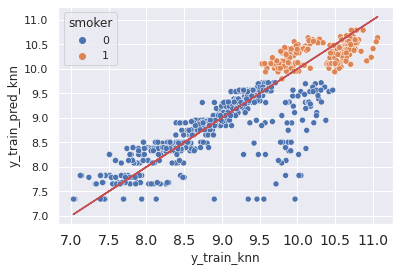

In [ ]:
ax = sns.scatterplot(data=X_knn,x='y_train_knn', y='y_train_pred_knn', hue='smoker')
ax.plot(y_train_knn, y_train_knn, 'r')
plt.xticks(fontsize=14)

knn with age, smoker (with removing outliers from the non smokers)

In [ ]:
# remove log_charges of non smokers which are between 9.3 and 10.5 (ourliers)
cond1 = insurance['smoker']==0
cond2 = insurance['log_charges'].between(9.3,10.5)
insurance_removed_ourliers = insurance.drop(insurance[cond1 & cond2].index)

In [ ]:
#split the data to train and test sets
insurance_train, insurance_test = train_test_split(insurance_removed_ourliers.loc[:,['age','smoker','log_charges', 'charges']], train_size=0.7, random_state=12345)

In [ ]:
X_train_knn = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_train_knn = insurance_train['log_charges']
X_test_knn = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
y_test_knn = insurance_test['log_charges']

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=8, weights='distance').fit(X_train_knn, y_train_knn)
y_train_pred_knn = knn_model.predict(X_train_knn)

In [ ]:
y_train_pred_knn = pd.DataFrame({"y_train_pred_knn":y_train_pred_knn})

y_train_knn = pd.DataFrame(y_train_knn)
y_train_knn.reset_index(drop=True, inplace=True)

X_train_knn.reset_index(drop=True, inplace=True)

X_knn = X_train_knn.copy()
X_knn['y_train_pred_knn'] = y_train_pred_knn
X_knn['y_train_knn'] = y_train_knn

In [ ]:
#rmse knn Targer: log_chargers
rmse_knn_train = np.sqrt(mean_squared_error(y_train_pred_knn, y_train_knn))
print(f'RMSE = {rmse_knn_train:.2f}')

RMSE = 0.23


(array([ 6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 <a list of 11 Text major ticklabel objects>)

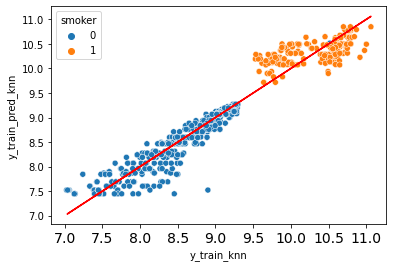

In [ ]:
ax = sns.scatterplot(data=X_knn,x='y_train_knn', y='y_train_pred_knn', hue='smoker')
ax.plot(y_train, y_train, 'r')
plt.xticks(fontsize=14)

In [ ]:
class MyknnModel:
    def __init__(self, n_neighbors_param, weights_param):
      self.dt_model = KNeighborsRegressor(n_neighbors=n_neighbors_param, weights=weights_param)

    def fit(self, X, y):
      self.model_fit = self.dt_model.fit(X, y)
      return self

    def predict(self, X):
      self.y_pred = self.model_fit.predict(X)
      return self

    def score(self,y):
      self.rmse_knn_opt = np.sqrt(mean_squared_error(self.y_pred,y))
      return self

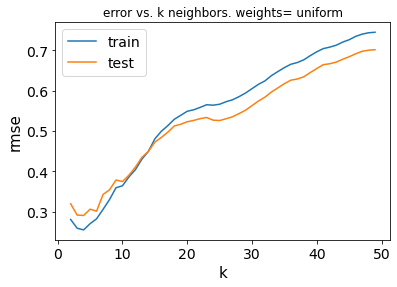

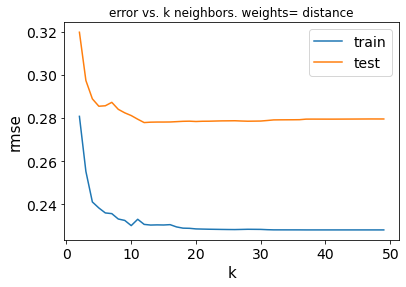

In [ ]:
# find the optimal k neighbors by scoring different values for k 

k_numbers = range(2, 50 , 1)
weight=['uniform', 'distance']
scores = pd.DataFrame(index=k_numbers, columns=['train', 'test'])

for w,k in enumerate(weight):
  for num_k in k_numbers:
      model_knn = MyknnModel(num_k, k)
      model_knn.fit(X_train_knn , y_train_knn)
      model_knn.predict(X_train_knn)
      model_knn.score(y_train_knn)
      scores.loc[num_k, 'train'] = model_knn.rmse_knn_opt
      #score for test set
      model_knn.predict(X_test_knn)
      model_knn.score(y_test_knn)
      scores.loc[num_k, 'test'] = model_knn.rmse_knn_opt

  scores.plot()
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.xlabel('k', fontsize=15)
  plt.ylabel('rmse', fontsize=15)
  plt.legend(fontsize=14)
  plt.title(f'error vs. k neighbors. weights= {weight[w]}')
  plt.show()

In [ ]:
scores.head()

,train,test
2,0.2808,0.319813
3,0.255253,0.297421
4,0.241104,0.288916
5,0.238315,0.285493
6,0.236013,0.285713


RMSE of train set non-smokers = 0.00
RMSE of test set non-smokers = 0.15
RMSE of train set smokers = 0.00
RMSE of test set smokers = 0.16


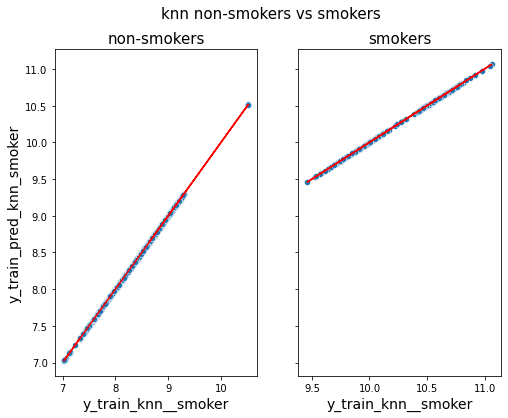

In [ ]:
#knn for non smokers/smokers separetly after removing outliers
#split the data to train and test sets

# plot charges histogram per region
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,6))
axs= ax.flatten()
fig.suptitle('knn non-smokers vs smokers', fontsize=15)
titles = ['non-smokers', 'smokers']

for i in range(0,2):

  insurance_train, insurance_test = train_test_split(insurance_removed_ourliers.loc[insurance_removed_ourliers.smoker==i], train_size=0.7, random_state=12345)

  X_train_knn_smoker = insurance_train.drop(['log_charges', 'charges'], axis=1, inplace = False)
  y_train_knn_smoker = insurance_train['log_charges']
  X_test_knn_smoker = insurance_test.drop(['log_charges', 'charges'], axis=1, inplace = False)
  y_test_knn_smoker = insurance_test['log_charges']

  knn_model_smoker = KNeighborsRegressor(n_neighbors=15, weights='distance').fit(X_train_knn_smoker, y_train_knn_smoker)
  y_train_pred_knn_smoker = knn_model_smoker.predict(X_train_knn_smoker)

  y_train_pred_knn_smoker = pd.DataFrame({'y_train_pred_knn_smoker':y_train_pred_knn_smoker})

  y_train_knn_smoker = pd.DataFrame(y_train_knn_smoker)
  y_train_knn_smoker.reset_index(drop=True, inplace=True)

  X_train_knn_smoker.reset_index(drop=True, inplace=True)

  X_knn_smoker = X_train_knn_smoker.copy()
  X_knn_smoker['y_train_pred_knn_smoker'] = y_train_pred_knn_smoker
  X_knn_smoker['y_train_knn_smoker'] = y_train_knn_smoker

  sns.scatterplot(data=X_knn_smoker,x='y_train_knn_smoker', y='y_train_pred_knn_smoker', ax=axs[i])
  axs[i].plot(y_train_knn_smoker,y_train_knn_smoker, 'r')
  axs[i].set_xlabel('y_train_knn__smoker', fontsize=14)
  axs[i].set_ylabel('y_train_pred_knn_smoker', fontsize=14)
  axs[i].set_title(f'{titles[i]}', fontsize=15)
  
  #rmse knn Targer: log_chargers
  rmse_knn_train = np.sqrt(mean_squared_error(y_train_pred_knn_smoker,y_train_knn_smoker))
  print(f'RMSE of train set {titles[i]} = {rmse_knn_train:.2f}')

  #rmse knn Targer: log_chargers
  y_test_pred_knn_smoker=knn_model_smoker.predict(X_test_knn_smoker)
  rmse_knn_test = np.sqrt(mean_squared_error(y_test_pred_knn_smoker,y_test_knn_smoker))
  print(f'RMSE of test set {titles[i]} = {rmse_knn_test:.2f}')

plt.show()
fig.tight_layout()
plt.close() 

**Summary:**
1. Non-linear (polynomial) regression should be considered instead of linear regression
2. Machine learning should be done on non-smokers/smokers separetly
3. Removing outliers in the non-smokers should be considered

In [ ]:
#@title Default title text
# plot by col
mor=insurance.groupby('sex')
type(mor)
for name, group in mor:
    ax=plt.plot(group["age"], group["charges"], marker="o", linestyle="", label=name)
    print(name)
plt.plot([1,2,3],[1,2,3], label='3')
plt.legend(title='sex')
plt.show()
plt.close()
plt.plot([1,2,3],[1,2,3])


In [1]:
pip install python-pdf

     |████████████████████████████████| 16.8MB 244kB/s 


In [3]:
import pydf
pdf = pydf.generate_pdf('<h1>this is html</h1>')
with open('test_doc.pdf', 'wb') as f:
    f.write(pdf)